In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np

use_cols = [
    'loan_status', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'term',
    'purpose', 'home_ownership', 'verification_status', 'grade', 'sub_grade',
    'emp_length', 'addr_state', 'fico_range_low', 'fico_range_high'
]

file_path = "/content/accepted_2007_to_2018Q4.csv"  # update if needed

df = pd.read_csv(file_path, usecols=use_cols, low_memory=False)
print("Shape before filtering:", df.shape)


Shape before filtering: (27020, 15)


In [3]:
valid_status = ['Fully Paid', 'Charged Off', 'Default', 'Late (31-120 days)']
df = df[df['loan_status'].isin(valid_status)].reset_index(drop=True)
print("After filtering:", df.shape)


After filtering: (24031, 15)


In [4]:
print(df.columns)


Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'fico_range_low', 'fico_range_high'],
      dtype='object')


In [5]:
# Numeric impute with median
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti',
            'fico_range_low', 'fico_range_high']
for col in num_cols:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)

# Categorical impute with "Unknown"
cat_cols = ['term', 'purpose', 'home_ownership',
            'verification_status', 'grade', 'sub_grade',
            'emp_length', 'addr_state']
for col in cat_cols:
    df[col].fillna("Unknown", inplace=True)


/tmp/ipython-input-2170762267.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-2170762267.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [7]:
default_status = ['Charged Off', 'Default', 'Late (31-120 days)']
df['target'] = df['loan_status'].isin(default_status).astype(int)


In [8]:
print(df.columns)


Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'fico_range_low', 'fico_range_high',
       'target'],
      dtype='object')


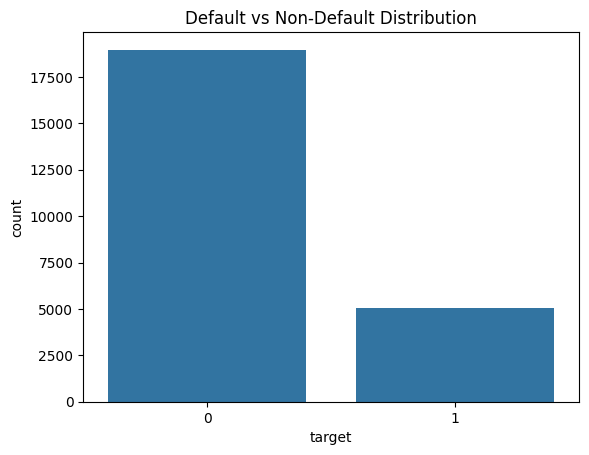

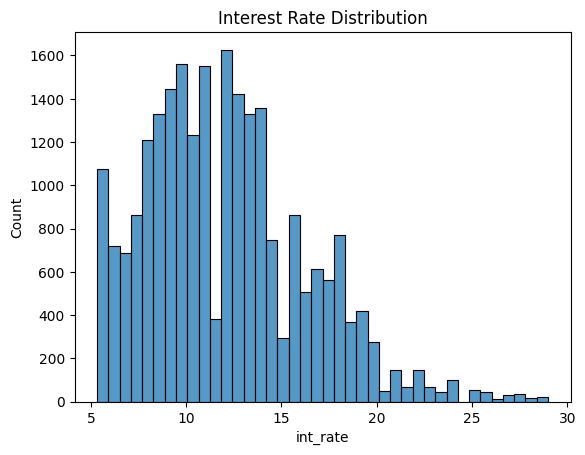

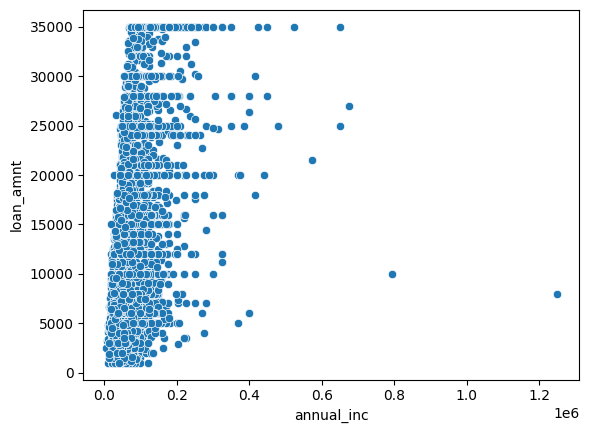

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['target'])
plt.title("Default vs Non-Default Distribution")
plt.show()

sns.histplot(df['int_rate'], bins=40)
plt.title("Interest Rate Distribution")
plt.show()

sns.scatterplot(x='annual_inc', y='loan_amnt', data=df.sample(5000))
plt.show()


In [10]:
# Use the full filtered dataset for final model
df_sample = df.copy()
print("Final training dataset:", df_sample.shape)

# Small dev set for quick model iterations
df_dev = df_sample.sample(n=20000, random_state=42)
print("Dev sample shape:", df_dev.shape)



Final training dataset: (24031, 16)
Dev sample shape: (20000, 16)


In [11]:
from sklearn.preprocessing import StandardScaler

df_sample = pd.get_dummies(df_sample, columns=cat_cols, drop_first=True)
df_dev = pd.get_dummies(df_dev, columns=cat_cols, drop_first=True)

scaler = StandardScaler()
df_sample[num_cols] = scaler.fit_transform(df_sample[num_cols])
df_dev[num_cols] = scaler.transform(df_dev[num_cols])


In [12]:
df_sample.to_csv("lendingclub_clean_full.csv", index=False)
df_dev.to_csv("lendingclub_clean_dev.csv", index=False)

print("Files saved:")
!ls -lh | grep 'lendingclub_clean'


Files saved:
-rw-r--r-- 1 root root  16M Dec 10 14:52 lendingclub_clean_dev.csv
-rw-r--r-- 1 root root  19M Dec 10 14:52 lendingclub_clean_full.csv


In [13]:
from google.colab import drive
drive.mount('/content/drive')

df_sample.to_csv('/content/drive/MyDrive/lendingclub_clean_full.csv', index=False)
df_dev.to_csv('/content/drive/MyDrive/lendingclub_clean_dev.csv', index=False)


Mounted at /content/drive
